# Enron Submission Free-Response Questions

### 1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]


#### In late 2001, Enron, an American energy company, filed for bankruptcy after one of the largest financial scandals in corporate history. After the company's collapse, over 600,000 emails generated by 158 Enron employees - now known as the Enron Corpus - were acquired by the Federal Energy Regulatory Commission during its investigation. The data was then uploaded online, and since then, a number of people and organizations have graciously prepared, cleaned and organized the dataset that is available to the public today (a few years later, financial data of top Enron executives were released following their trial).

#### Totally 145 data points in data set and have two class:POI/non POI. Two features in the data: 14 Finance and 6 Email.But there are many defect value in data set which like loan_advaces.

#### Through salary and bonus scatters graph to found abnormal value,but that value was cause by total orignal value sum("Total"),So need to cancel this abnormal value.After cancel this "total" value,it's also found two abnormal values: at least 5 millions bonus and over 1 million salary.the suspicious person to correspond these two value is LAY KENNETH L and SKILLING JEFFREY K.From the Enron background to realized these two person are core person in Enron.In other word.these tow values are key value.

### 2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]



#### First of all,I was cancel the total_payments and total_stock_value,because those are sum of other values.And other NAN I was choice to leave behind it maybe have other hinting information of values.

#### Base on those values I was created tow new value "from_this_person_to_poi_ratio"and"from_poi_to_this_person_ratio"which means"the ratio of suspicious person send POI mails to totally send mails"and "the ratio of suspicious person recived POI mails to totally recive mails".Because of send and recive mails ratio can show the suspicious person who are the POI.

#### After the treatment the values the evaluation result as below：

In [39]:
%run poi_id.py

estimator: Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', GaussianNB(priors=None))]), f1 score: 0.330611904762

estimator: Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]), f1 score: 0.495900333

estimator: Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=

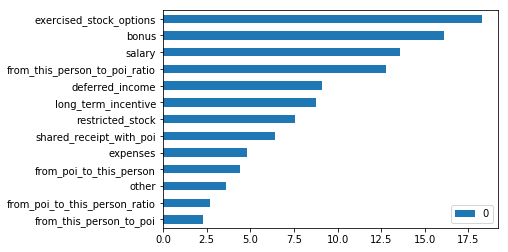

In [40]:
import operator
import pandas as pd
%matplotlib inline
selected_features = dict()
for f in features_list[1:]:
    selected_features[f] = feature_scores[f]
sorted_features = sorted(selected_features.items(), key=operator.itemgetter(1), reverse=True)
indices = []
scores = []
for t in sorted_features:
    indices.append(t[0])
    scores.append(t[1])
df = pd.DataFrame(scores, index=indices)
df.plot(kind='barh').invert_yaxis()

#### In the seclected feature I was used automatic feature to choice SelectKBest to check of the values score,and cancel the lowest score 2.0. I also cancel the much more NA features like("loan_advances").From analysis graph,the score "from_this_person_to_poi_ratio" over 12.5 and the score "from_poi_to_this_person_ratio only 2.5 which means the ratio of suspicious peron send mails to POI mails to total send mails can explain the problem.

### 3.What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? [relevant rubric item: “pick an algorithm”]

我最终使用了支持向量机分类器算法。我还尝试了“朴素贝叶斯”，“决策树”和“基于决策树的AdaBoost”算法。我是以f1分数作为算法性能的评估标准的，其中支持向量机分类算法得分为0.496；其次是朴素贝叶斯分类器，得分为0.331；AdaBoost和决策树算法性能分别为0.26和0.235。

## 4. 调整算法的参数是什么意思，如果你不这样做会发生什么？你是如何调整特定算法的参数的？（一些算法没有需要调整的参数 – 如果你选择的算法是这种情况，指明并简要解释对于你最终未选择的模型或需要参数调整的不同模型，例如决策树分类器，你会怎么做）。

调整算法的参数是指根据具体要解决的问题选择合适的算法参数以提高分类器性能，如果不调参最后得出的分类器性能就达不到要求（f1值过低）。对于我所选择的支持向量机分类器算法，我是通过Pipeline+GridSearchCV的机制进行参数调整的。即通过Pipeline封装一系列步骤：首先进行标准特征缩放（SVM算法要求对特征进行缩放）和PCA；然后向GridSearchCV的param_grid参数传递参数C，kernel，class_weight和gamma等参数值的不同组合；最后由GridSearchCV给出最佳的参数组合即可。

## 5. 什么是验证，未正确执行情况下的典型错误是什么？你是如何验证你的分析的？

验证是指将数据分为训练集和测试集两个部分，通过训练集拟合模型，然后用测试集验证算法的性能。如果没有正确执行验证，那么得到的算法模型可能是过拟合的——对未知情况适应性非常差。

我通过三个度量指标来对每个分类器算法性能进行评估：f1分数，精确度和召回率。我首先将待评估的算法分别用GridSearchCV进行封装，然后迭代地对每个分类器算法进行拟合（GridSearchCV会自动执行交叉验证过程），然后我通过estimate_classifier()函数对拟合过后的分类器计算f1分数，最后选择f1分数最高的“最优参数+最优算法模型”作为最终的clf。

estimate_classifier()函数的原理：首先通过StratifiedShuffleSplit算法将数据分为若干训练集和测试集。StratifiedShuffleSplit算法通过打乱顺序然后分为多个分层的容器来将数据分为测试集和训练集，每个容器中的数据集目标类别（label）比例是按照完整数据集的类别比例进行分配的。然后我对得到的若干训练集+测试集数据用分类器进行拟合，调用sklearn.metrics.f1_score计算得到一个f1分数，最后汇总多次计算的f1分数平均值作为性能评估标准。

## 6. 给出至少 2 个评估度量并说明每个的平均性能。解释对用简单的语言表明算法性能的度量的解读。

对我所选择的支持向量机分类器而言，最优参数为C=1.0，class_weight='balanced'，kernel='sigmoid'和gamma=0.10000000000000001，PCA的n_components参数为4。

精确度0.331，即被标记为POI的人中有33.1%为真正的POI；召回率0.862，即所有为POI的人中有86.2%被正确的标记。